In [167]:
from IPython import display

# Práctica 3 - Formulario Hipotecas ING
La práctica consistirá en utilizar la librería *Selenium* para interactuar con la página del banco ING, en concreto, con la  <a href="https://www.ing.es/hipotecas" target="_blank">sección de hipotecas</a>.

El objetivo del ejercicio consiste en navegar hasta la URL indicada anteriormente e interactuar (hacer click) con el objeto desplegable "Comprar una casa" y, a continuación, en la opción desplegable "Ya tengo la casa que quiero comprar".

Al hacer click en ese elemento, se redirigirá a un formulario que se deberá cumplimentar correctamente con cada uno de los valores de: número de titulares y edad, que se encuentran en el fichero *input_hipotecas.xlsx*. Después de introducir los datos en el formulario, se deberá escribir "OK" en el fichero como comprobante de que se ha realizado la consulta.

Finalmente, el programa debe retornar a la <a href="https://www.ing.es/hipotecas" target="_blank">página de inicio</a>

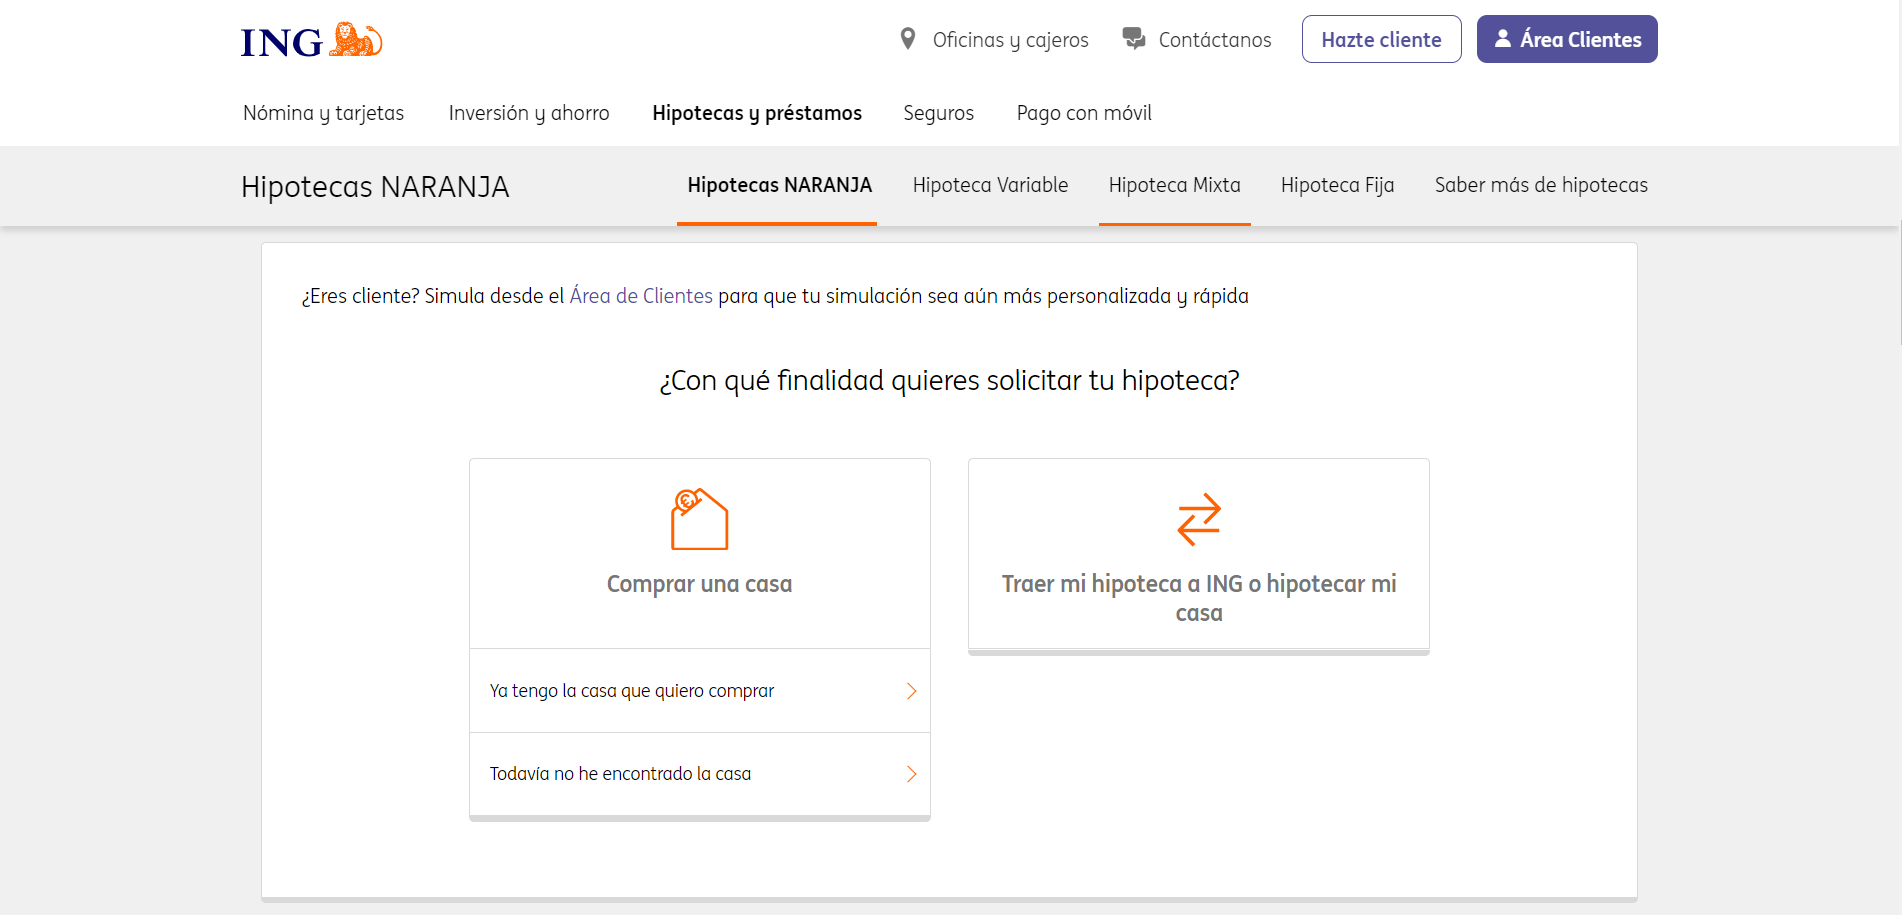

In [168]:
display.Image("hipotecas.png")

In [169]:
import os
import time
import json
import requests
import pandas as pd
import openpyxl
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [170]:
# Connect and open webpage
chromedriver = "C:\\Scripts\\Selenium\\chromedriver"
driver = webdriver.Chrome(chromedriver)

# Load Excel workbook
wb = openpyxl.load_workbook('input_hipotecas.xlsx')
ws = wb.active

# Load webpage
url = "https://www.ing.es/hipotecas"
driver.get(url)
driver.switch_to.window(driver.current_window_handle)
driver.maximize_window()
# Accept cookies
driver.find_element_by_xpath("/html/body/div[2]/div[2]/div/div/a[1]").click()

for row in range(2, ws.max_row + 1):
    op_titular = ws.cell(row=row, column=1).value
    edad = ws.cell(row=row, column=2).value
    print("--------------------------------")
    print("Iteración " + str(row - 1) + ": " + str(op_titular) + ", " + str(edad))
    print("--------------------------------")
    
        
    # Retrieve the last shadowroot using javascript 'app-mrtg-el-accordion-button-group' element
    time.sleep(10)
    javascript = """return document
        .querySelector('ing-uic-cms-mortgage-simulator').shadowRoot
        .querySelector('ing-orange-revamp-mortgages').shadowRoot
        .querySelector('ing-app-revamp-mortgages').shadowRoot
        .querySelector('rubik-router')
        .querySelector('router-slot')
        .querySelector('app-mrtg-pg-dist').shadowRoot
        .querySelector('app-mrtg-el-accordion-button-group').shadowRoot"""
    shadow_root = driver.execute_script(javascript)

    # Getting the information from the "Comprar una casa" button
    button_label = shadow_root.find_element_by_tag_name('li').find_element_by_tag_name('app-mrtg-el-accordion-button').get_attribute('title')
    button = shadow_root.find_element_by_tag_name('li')
    button.click()
    
#     driver.execute_script("window.scrollTo(0, 20)")
    driver.execute_script('arguments[0].scrollIntoView(true);', button)
    
    # Find first element from the drop-down list
    li1 = shadow_root.find_element_by_tag_name('li').find_element_by_tag_name('app-mrtg-el-accordion-button').find_element_by_tag_name('ul').find_elements_by_tag_name('li')[0]
    time.sleep(3)
    li1.click()
    
    ## FORM
    # First radio buttons form
    time.sleep(3)
    javascript = """return document
        .querySelector('ing-uic-cms-mortgage-simulator').shadowRoot
        .querySelector('ing-orange-revamp-mortgages').shadowRoot
        .querySelector('ing-app-revamp-mortgages').shadowRoot
        .querySelector('rubik-router')
        .querySelector('router-slot')
        .querySelector('app-mrtg-pg-step-1').shadowRoot
        .querySelector('div')
        .querySelector('app-mrtg-el-radio-button-list').shadowRoot
        .querySelector('div')"""
    shadow_root_form = driver.execute_script(javascript)

    if op_titular == 1:
        option = 0
    elif op_titular >= 2:
        option = 1
    
    radio_button = shadow_root_form.find_elements_by_tag_name('span')[option]
    radio_button.click()
    
    # Form input
    time.sleep(1)
    javascript = """return document
        .querySelector('ing-uic-cms-mortgage-simulator').shadowRoot
        .querySelector('ing-orange-revamp-mortgages').shadowRoot
        .querySelector('ing-app-revamp-mortgages').shadowRoot
        .querySelector('rubik-router')
        .querySelector('router-slot')
        .querySelector('app-mrtg-pg-step-1').shadowRoot
        .querySelector('div')
        .querySelector('app-mrtg-el-input').shadowRoot"""
    shadow_root_input = driver.execute_script(javascript)
    
    input_object = shadow_root_input.find_element_by_tag_name('input')
    input_object.click()
    input_object.send_keys(edad)
    
    cell_name = 'C' + str(row)
    ws[cell_name].value = "OK"
    wb.save("input_hipotecas.xlsx")
    
    print("Finished")
    print()
    
    time.sleep(3)
    
#     url = 'http://25.15.3.47/'
    
    try:
        response = requests.get(url)
    except:
        cell_name = 'D' + str(row)
        ws[cell_name].value = "SITE DOWN"
        wb.save("input_hipotecas.xlsx")
        raise Exception("No se pudo conectar con la página web")
    
    if response.status_code == 200:
        driver.get(url)
        continue
    else:
        print("Error: " + str(response.status_code))
        break

--------------------------------
Iteración 1: 1, 25
--------------------------------
Finished

--------------------------------
Iteración 2: 2, 33
--------------------------------
Finished



In [441]:
# Test using some Expected Conditions
try:
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "ing-uic-cms-mortgage-simulator")))
    print("Localizado")
finally:
    javascript = """return document
        .querySelector('ing-uic-cms-mortgage-simulator').shadowRoot
        .querySelector('ing-orange-revamp-mortgages').shadowRoot
        .querySelector('ing-app-revamp-mortgages').shadowRoot
        .querySelector('rubik-router')
        .querySelector('router-slot')
        .querySelector('app-mrtg-pg-dist').shadowRoot
        .querySelector('app-mrtg-el-accordion-button-group').shadowRoot"""
    shadow_root = driver.execute_script(javascript)

Localizado
